In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from igor import binarywave as bw
from scipy import signal
from pyguck.analysis import potential, filtering

In [34]:
Tm1_1 = bw.load('ch0_5jk162a.ibw')
#current wave
currTm1_1 = Tm1_1['wave']['wData']
#timestamp wave
tsTm1_1 = 0.001*(np.arange(0,len(currTm1_1),1))

{'version': 5,
 'wave': {'bin_header': {'checksum': 28,
   'dataEUnitsSize': 0,
   'dimEUnitsSize': array([0, 0, 0, 0]),
   'dimLabelsSize': array([0, 0, 0, 0]),
   'formulaSize': 0,
   'noteSize': 48,
   'optionsSize1': 0,
   'optionsSize2': 0,
   'sIndicesSize': 0,
   'wfmSize': 6800320},
  'data_units': '',
  'dimension_units': '',
  'formula': '',
  'labels': [[], [], [], []],
  'note': 'TIME:5/12/2017 15:57:13.2;PATTERN:Rm;HC0:0;HP1:0',
  'sIndices': array([], dtype=float64),
  'wData': array([-57.61314774, -57.56713867, -57.55399704, ..., -55.03005981,
         -55.04320145, -55.04320145], dtype=float32),
  'wave_header': {'aModified': 3,
   'bname': 'ch0_5',
   'botFullScale': -10.0,
   'creationDate': 3577449433,
   'dFolder': 86193288,
   'dLock': 0,
   'dataEUnits': 0,
   'dataUnits': array(['m', 'V', '', ''], 
         dtype='|S1'),
   'depID': 515,
   'dimEUnits': array([0, 0, 0, 0]),
   'dimLabels': array([0, 0, 0, 0]),
   'dimUnits': array([['s', '', '', ''],
          ['

In [56]:

vdata = signal.decimate(currTm1_1, 10)
vdata = vdata[10:]

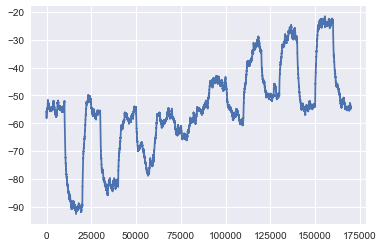

In [57]:
plt.plot(vdata)
plt.show()

In [58]:
vtimes = np.arange(0, len(vdata)*.1, .1)

In [63]:
dvdt_max,timestamps,max_idx = potential.calculate_dvdt_max(
    vdata,vtimes)

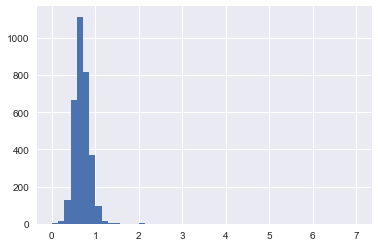

In [70]:

plt.hist(dvdt_max, bins=np.linspace(0,7,50))
plt.show()

In [65]:
Vm_dvdt = vdata[max_idx]

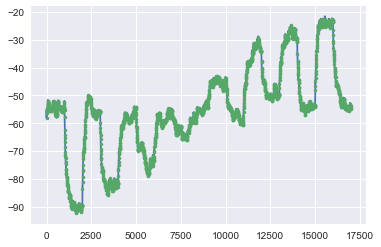

In [67]:
plt.plot(vtimes, vdata)
plt.plot(timestamps, Vm_dvdt, linestyle='', marker='.')